# Module 11 Challenge
## Deliverable 2: Scrape and analyze Mars weather data, which exists in a table.

In [34]:
 # Import dependencies
from splinter import Browser
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt

from webdriver_manager.chrome import ChromeDriverManager

In [35]:
 # Set up Splinter
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

# Visit the Website

In [36]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

# Scrape the Table

In [37]:
 # Scrape the website
html = browser.html

# Create a BeautifulSoup object from the scraped HTML
soup = BeautifulSoup(html, 'lxml')

In [38]:
# Extract all rows of data
table = str(soup.find("table", {"class": "table"}))

# Store the Data

In [39]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
df = pd.read_html(table)[0]
df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


In [40]:
# Confirm DataFrame was created successfully
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                1867 non-null   int64  
 1   terrestrial_date  1867 non-null   object 
 2   sol               1867 non-null   int64  
 3   ls                1867 non-null   int64  
 4   month             1867 non-null   int64  
 5   min_temp          1867 non-null   float64
 6   pressure          1867 non-null   float64
dtypes: float64(2), int64(4), object(1)
memory usage: 102.2+ KB


In [41]:
dfs = pd.read_html("https://static.bc-edx.com/data/web/mars_facts/temperature.html")
df2 = dfs[0]
df2.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


# Prepare Data for Analysis

In [42]:
# Examine data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                1867 non-null   int64  
 1   terrestrial_date  1867 non-null   object 
 2   sol               1867 non-null   int64  
 3   ls                1867 non-null   int64  
 4   month             1867 non-null   int64  
 5   min_temp          1867 non-null   float64
 6   pressure          1867 non-null   float64
dtypes: float64(2), int64(4), object(1)
memory usage: 102.2+ KB


In [43]:
# Change data types for data analysis
df["terrestrial_date"] = pd.to_datetime(df.terrestrial_date)

In [44]:
# Confirm type changes were successful by examining data types again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                1867 non-null   int64         
 1   terrestrial_date  1867 non-null   datetime64[ns]
 2   sol               1867 non-null   int64         
 3   ls                1867 non-null   int64         
 4   month             1867 non-null   int64         
 5   min_temp          1867 non-null   float64       
 6   pressure          1867 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(4)
memory usage: 102.2 KB


# Analyze the Data

In [45]:
# 1. How many months are there on Mars?
df.month.value_counts().sort_index()

1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: month, dtype: int64

In [46]:
# How many Martian days' worth of data are there?
len(df)

1867

In [47]:
# What is the average low temperature by month?
df.groupby("month").min_temp.mean()

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

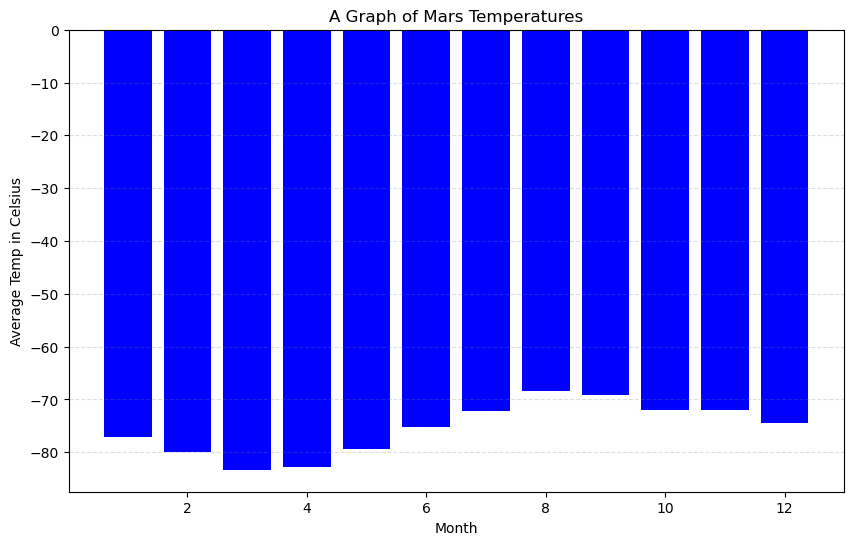

In [48]:
# Plot the average temperature by month
data = df.groupby("month").min_temp.mean()

# data.plot(kind="bar")
# plt.show()

plt.figure(figsize=(10,6))
plt.bar(data.index, data.values, color="blue")
plt.xlabel("Month")
plt.ylabel("Average Temp in Celsius")

plt.title("A Graph of Mars Temperatures")
plt.grid(axis="y", color="grey", linestyle="--", alpha=0.25)
plt.show()

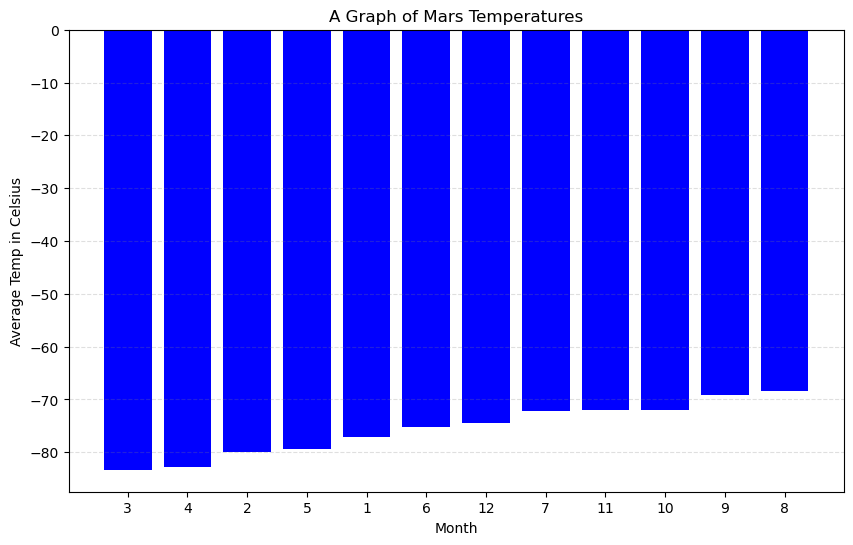

In [49]:
# Identify the coldest and hottest months in Curiosity's location
data = df.groupby("month").min_temp.mean().sort_values()

# data.plot(kind="bar")
# plt.show()

plt.figure(figsize=(10,6))
plt.bar(data.index.astype(str), data.values, color="blue")
plt.xlabel("Month")
plt.ylabel("Average Temp in Celsius")

plt.title("A Graph of Mars Temperatures")
plt.grid(axis="y", color="grey", linestyle="--", alpha=0.25)
plt.show()

In [50]:
# df
data

month
3    -83.307292
4    -82.747423
2    -79.932584
5    -79.308725
1    -77.160920
6    -75.299320
12   -74.451807
7    -72.281690
11   -71.985507
10   -71.982143
9    -69.171642
8    -68.382979
Name: min_temp, dtype: float64

In [51]:
# Average pressure by Martian month
df.groupby("month").pressure.mean()

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

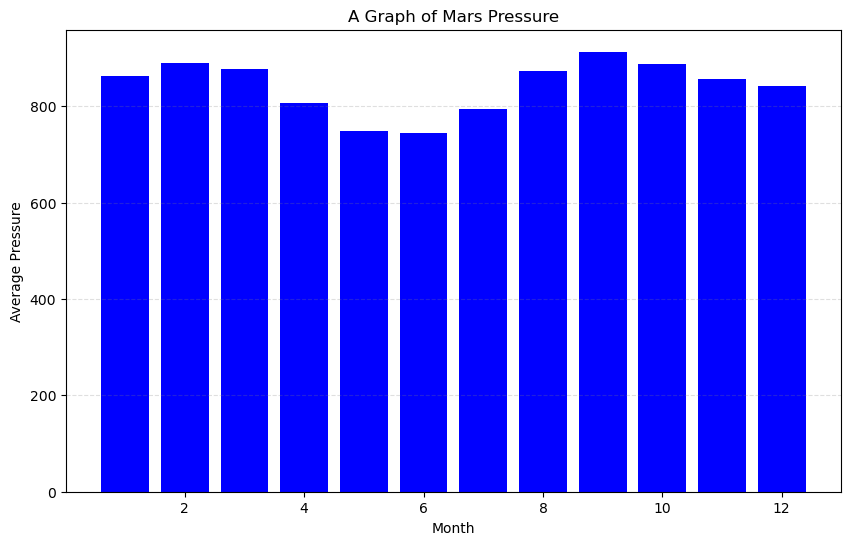

In [52]:
# Plot the average pressure by month
data = df.groupby("month").pressure.mean()

# data.plot(kind="bar")
# plt.show()

plt.figure(figsize=(10,6))
plt.bar(data.index, data.values, color="blue")
plt.xlabel("Month")
plt.ylabel("Average Pressure")

plt.title("A Graph of Mars Pressure")
plt.grid(axis="y", color="grey", linestyle="--", alpha=0.25)
plt.show()

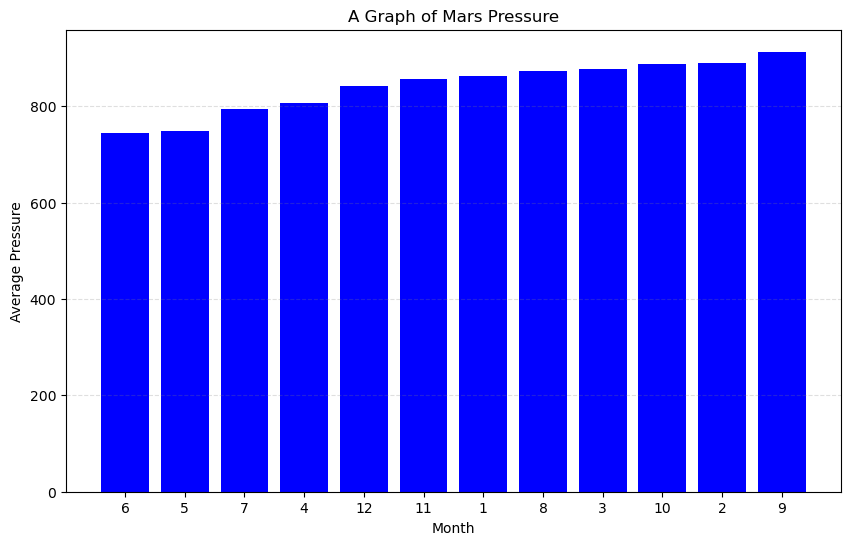

In [53]:
data = df.groupby("month").pressure.mean().sort_values()

# data.plot(kind="bar")
# plt.show()

plt.figure(figsize=(10,6))
plt.bar(data.index.astype(str), data.values, color="blue")
plt.xlabel("Month")
plt.ylabel("Average Pressure")

plt.title("A Graph of Mars Pressure")
plt.grid(axis="y", color="grey", linestyle="--", alpha=0.25)
plt.show()

In [54]:
#How many terrestrial (earth) days are there in a Martian year?
df.terrestrial_date.min()

Timestamp('2012-08-16 00:00:00')

In [55]:
df2 = df.sort_values(by="terrestrial_date", ascending=True)
df2.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


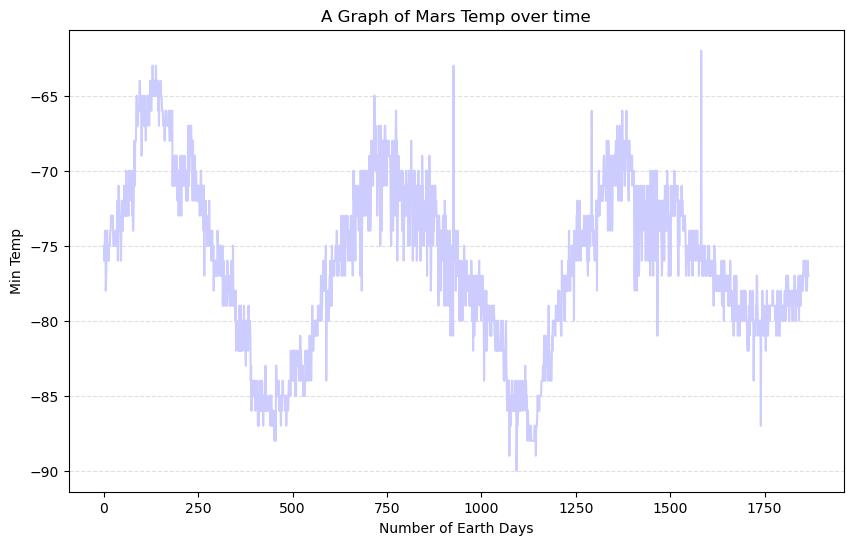

In [56]:
plt.figure(figsize=(10,6))
plt.plot(df2.index, df2.min_temp, color="#CCCCFF")
plt.xlabel("Number of Earth Days")
plt.ylabel("Min Temp")

plt.title("A Graph of Mars Temp over time")
plt.grid(axis="y", color="grey", linestyle="--", alpha=0.25)
plt.show()

In [ ]:
# Write the data to a CSV
df.to_csv("data.csv", index=False)

In [57]:
browser.quit()